In [ ]:
# Import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data using pandas
poll = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv", index_col='No')

## Data Preprocessing


In [ ]:
# First five rows
poll.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
# Shape of the data
poll.shape

(43824, 12)

In [ ]:
# Data summary
poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 1 to 43824
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.3+ MB


In [ ]:
# Checkimg for null values
poll.isna().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [ ]:
# Filling the null values with mean
poll['pm2.5'].fillna(poll['pm2.5'].mean(),inplace=True)

In [ ]:
# Describe the data
poll.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,89.853296,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,77.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


Checking the unique values of some columns:

In [ ]:
poll['year'].unique()

array([2010, 2011, 2012, 2013, 2014])

In [ ]:
poll['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
poll['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
poll['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Encoding the categorical column "cbwd" using LabelEncoder:

In [ ]:
poll['cbwd'].describe()

count     43824
unique        4
top          SE
freq      15290
Name: cbwd, dtype: object

In [ ]:
poll['cbwd'].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

In [ ]:
# Import Label Encoder
from sklearn.preprocessing import LabelEncoder

# Fit and transform the label encoder
poll['cbwd'] = LabelEncoder().fit_transform(poll['cbwd'])

In [ ]:
poll['cbwd'].value_counts()

2    15290
1    14150
3     9387
0     4997
Name: cbwd, dtype: int64

Scaling the continuous columns:

In [ ]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Instantiate standard scaler
sc = StandardScaler()

# Fit and transform scaler
poll[['DEWP','TEMP','PRES','Iws','Is','Ir']] = sc.fit_transform(poll[['DEWP','TEMP','PRES','Iws','Is','Ir']])

## Exploratory Data Analysis

<ipython-input-18-b01c7c06fc6b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


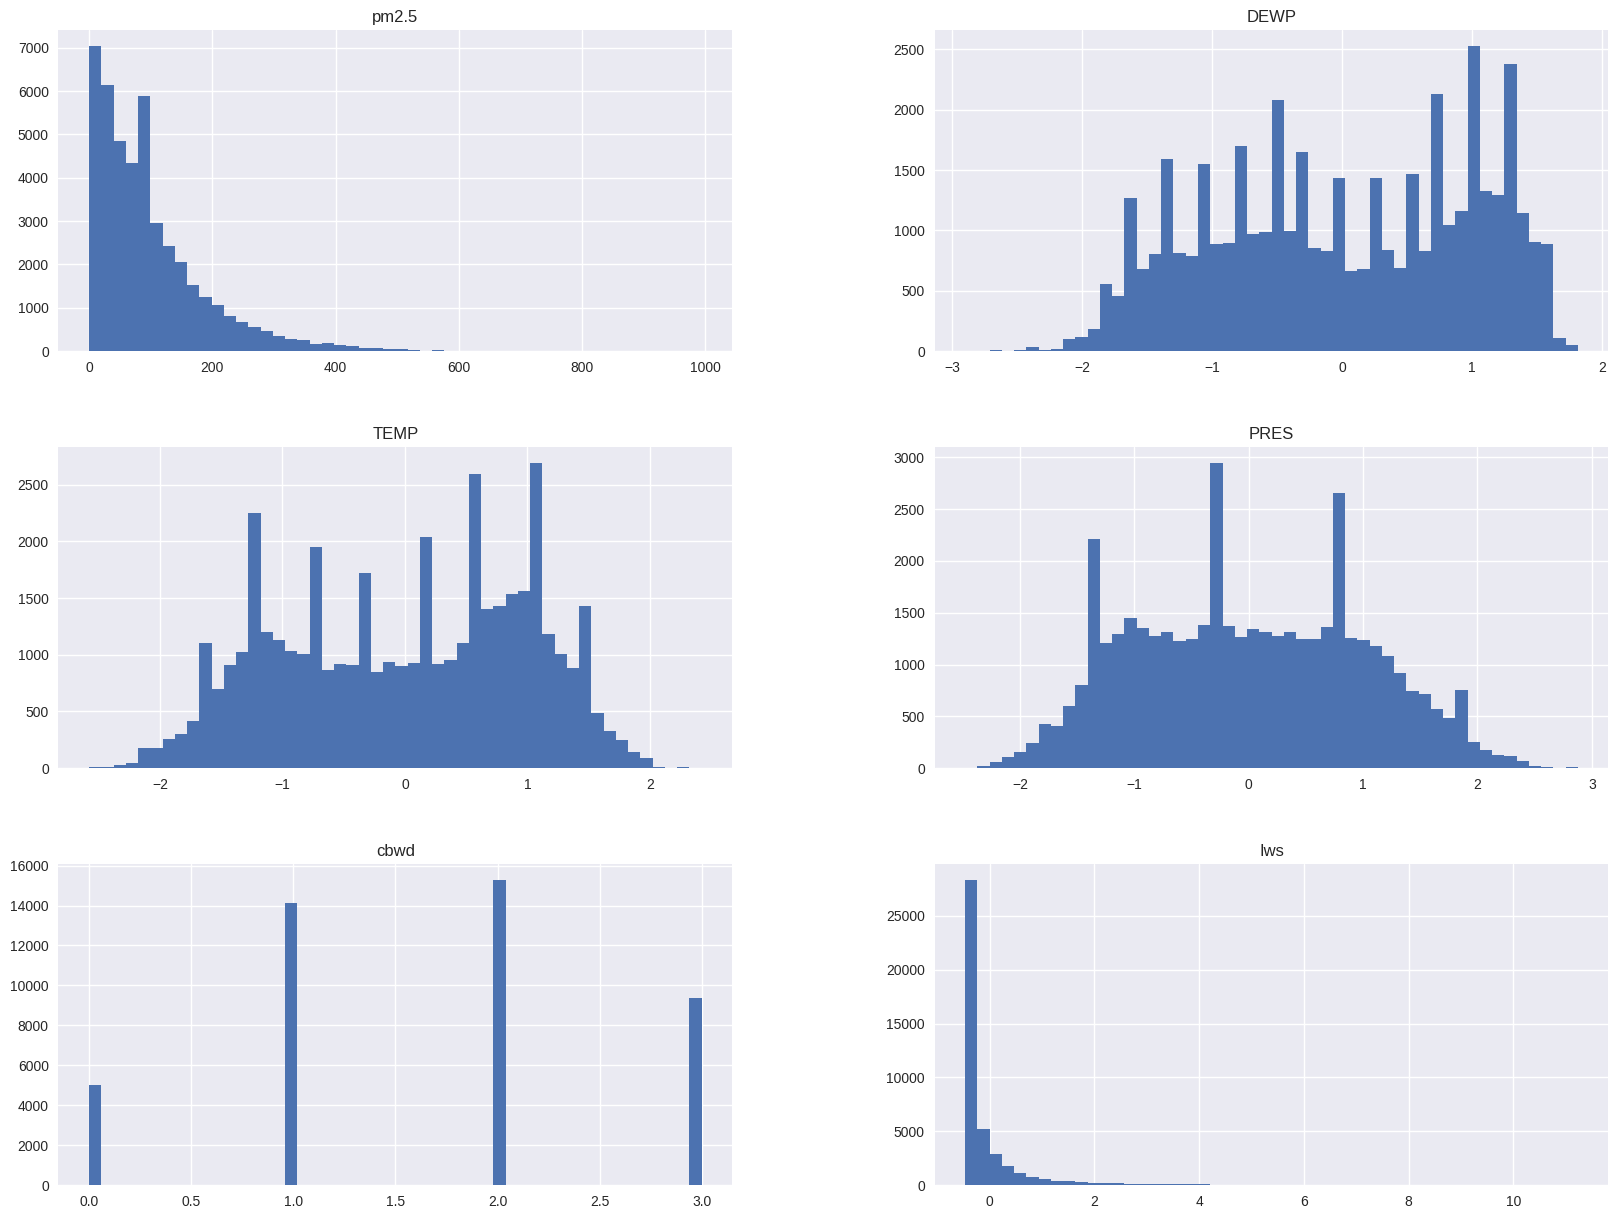

In [ ]:
# Store continuous columns in a new variable named poll_cont
poll_cont = poll.drop(['year','month','day','hour','Is','Ir'],axis=1)

# Histogram
plt.style.use('seaborn')
poll_cont.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

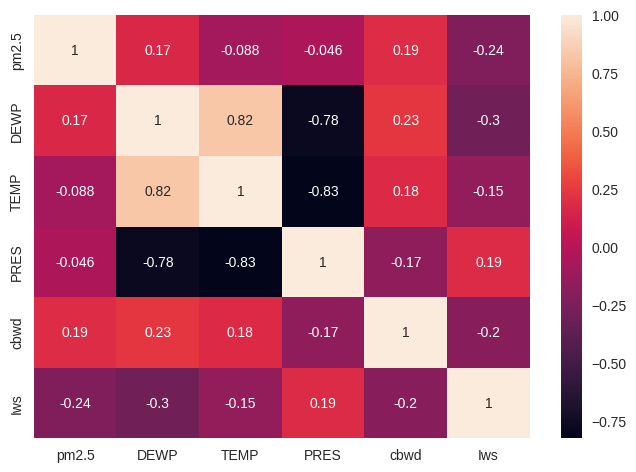

In [ ]:
# Plot the correlation
sns.heatmap(poll_cont.corr(),annot=True)

## Model Implementation and Evaluation

In [ ]:
# Import required models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import arange

In [ ]:
# Diving dependent and independent variables
x = poll.drop('pm2.5', axis=1).values
y = poll['pm2.5'].values

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

#### Ridge Regression

In [ ]:
# Instantiate Ridge
ridge = Ridge(alpha=123)

# Fit ridge on train data
ridge.fit(x_train,y_train)

Ridge(alpha=123)

##### Evaluation of Ridge Regression

In [ ]:
# Predictions on test and train using ridge
y_pred = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train)

In [ ]:
# Test data
print("Test Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R2_Score:", r2_score(y_test, y_pred))

Test Evaluation
MAE: 56.43722152062562
MSE: 6133.579692390568
RMSE: 78.31717367468369
R2_Score: 0.25830440149075784


In [ ]:
# Train data
print("Train Evaluation")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", mean_squared_error(y_train, y_pred_train)**0.5)
print("R2_Score:", r2_score(y_train, y_pred_train))

Train Evaluation
MAE: 55.617837950575144
MSE: 5948.266944631002
RMSE: 77.12500855514378
R2_Score: 0.2571394449600767


#### Random Forest Regressor

In [ ]:
# Instantiate and fit the model
rfr = RandomForestRegressor(n_estimators=20, random_state=123)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=123)

##### Evaluation of Random forest

In [ ]:
# Predictions on test and train using random forest
y_pred = rfr.predict(x_test)
y_pred_train = rfr.predict(x_train)

In [ ]:
# Test data
print("Test Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R2_Score:", r2_score(y_test, y_pred))

Test Evaluation
MAE: 24.110175865776664
MSE: 1474.1029556014548
RMSE: 38.39404843984878
R2_Score: 0.8217459087919774


In [ ]:
# Train data
print("Train Evaluation")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", mean_squared_error(y_train, y_pred_train)**0.5)
print("R2_Score:", r2_score(y_train, y_pred_train))

Train Evaluation
MAE: 9.276434046008333
MSE: 235.09416622105266
RMSE: 15.332780772614361
R2_Score: 0.9706398209039266


## Cross Validation

In [ ]:
# Import required models and metrics
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#### RidgeCV

In [ ]:
# Instantiate and fit RidgeCV on train data
rcv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
ridgecv = RidgeCV(alphas=arange(630,640,0.1), cv=rcv, scoring='neg_mean_absolute_error')
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([630. , 630.1, 630.2, 630.3, 630.4, 630.5, 630.6, 630.7, 630.8,
       630.9, 631. , 631.1, 631.2, 631.3, 631.4, 631.5, 631.6, 631.7,
       631.8, 631.9, 632. , 632.1, 632.2, 632.3, 632.4, 632.5, 632.6,
       632.7, 632.8, 632.9, 633. , 633.1, 633.2, 633.3, 633.4, 633.5,
       633.6, 633.7, 633.8, 633.9, 634. , 634.1, 634.2, 634.3, 634.4,
       634.5, 634.6, 634.7, 634.8, 634.9, 635. , 635.1, 635.2, 635.3,
       635.4, 635...., 635.7, 635.8, 635.9, 636. , 636.1, 636.2,
       636.3, 636.4, 636.5, 636.6, 636.7, 636.8, 636.9, 637. , 637.1,
       637.2, 637.3, 637.4, 637.5, 637.6, 637.7, 637.8, 637.9, 638. ,
       638.1, 638.2, 638.3, 638.4, 638.5, 638.6, 638.7, 638.8, 638.9,
       639. , 639.1, 639.2, 639.3, 639.4, 639.5, 639.6, 639.7, 639.8,
       639.9]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=123),
        scoring='neg_mean_absolute_error')

In [ ]:
# Alpha value
ridgecv.alpha_

632.6000000000006

##### Evaluation of RidgeCV

In [ ]:
# Predictions on test and train using ridgecv
y_pred = ridgecv.predict(x_test)
y_pred_train = ridgecv.predict(x_train)

In [ ]:
# Test data
print("Test Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R2_Score:", r2_score(y_test, y_pred))

Test Evaluation
MAE: 56.393957626064626
MSE: 6161.0085408675295
RMSE: 78.49209221869124
R2_Score: 0.25498760164339007


In [ ]:
# Train data
print("Train Evaluation")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", mean_squared_error(y_train, y_pred_train)**0.5)
print("R2_Score:", r2_score(y_train, y_pred_train))

Train Evaluation
MAE: 55.50583376064022
MSE: 5967.581485717949
RMSE: 77.25012288480808
R2_Score: 0.2547273120067731


#### Random Forest with CV

In [ ]:
# Taking random parameter values
params = {'n_estimators': [25,27,30], 'max_depth': [20,23,25], 'min_samples_split': [9,10,11]}

In [ ]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor()

In [ ]:
# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=10, scoring="r2")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 23, 25],
                         'min_samples_split': [9, 10, 11],
                         'n_estimators': [25, 27, 30]},
             scoring='r2')

In [ ]:
# Best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=25, min_samples_split=9, n_estimators=30)

##### Evaluation of Random forest with CV

In [ ]:
# Predictions on test and train using random forest
y_pred = rf_best.predict(x_test)
y_pred_train = rf_best.predict(x_train)

In [ ]:
# Test data
print("Test Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R2_Score:", r2_score(y_test, y_pred))

Test Evaluation
MAE: 25.909466913662243
MSE: 1622.9401291345912
RMSE: 40.285731086013456
R2_Score: 0.8037479562030451


In [ ]:
# Train data
print("Train Evaluation")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", mean_squared_error(y_train, y_pred_train)**0.5)
print("R2_Score:", r2_score(y_train, y_pred_train))

Train Evaluation
MAE: 15.211603683728946
MSE: 589.8684919925474
RMSE: 24.287208402625186
R2_Score: 0.9263331589787402
